In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels 

In [3]:
df = pd.read_csv("data/macrodata.csv", index_col=0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


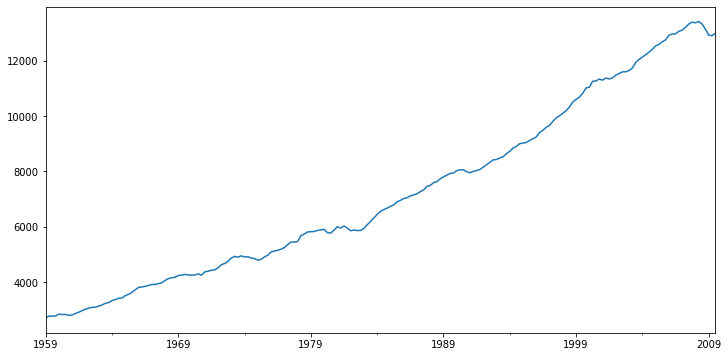

In [5]:
df["realgdp"].plot(figsize=(12, 6));

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [10]:
gdp_cycle, gdp_trend = hpfilter(df["realgdp"], lamb=1600)

In [11]:
type(gdp_cycle)

pandas.core.series.Series

In [14]:
df["trend"] = gdp_trend

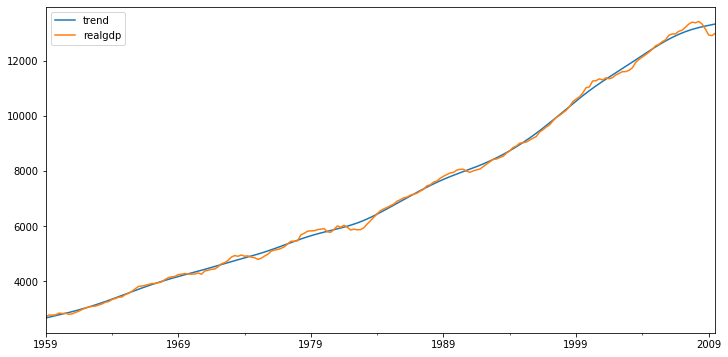

In [15]:
df[["trend", "realgdp"]].plot(figsize=(12, 6))

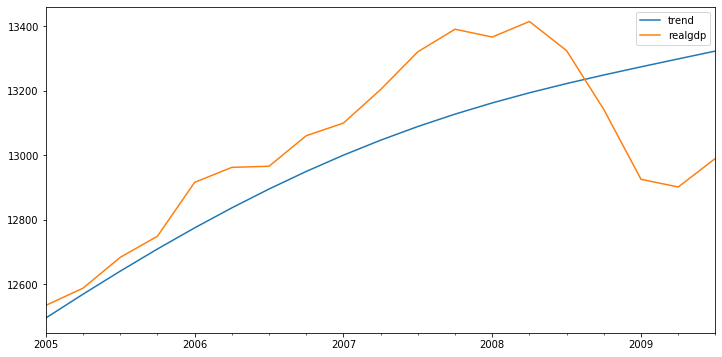

In [16]:
df[["trend", "realgdp"]]["2005-01-01": ].plot(figsize=(12, 6))

### ETS Decomposition

**Error - Trend - Seasonality**

Error - is also called Residual, Noise

In [17]:
df = pd.read_csv(
    "data/airline_passengers.csv",
    index_col="Month", parse_dates=True
)

In [18]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
df = df.dropna()

In [20]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


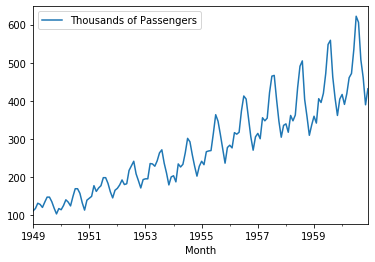

In [21]:
df.plot()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
result = seasonal_decompose(
    df["Thousands of Passengers"],
    model="multiplication"
)

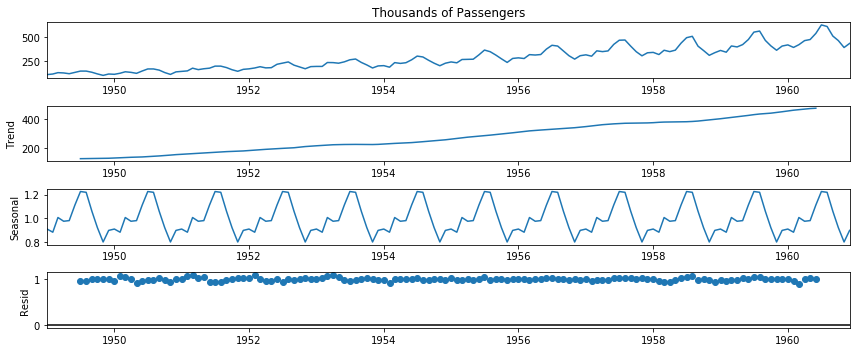

In [33]:
from pylab import rcParams
rcParams["figure.figsize"] = 12, 5

result.plot();

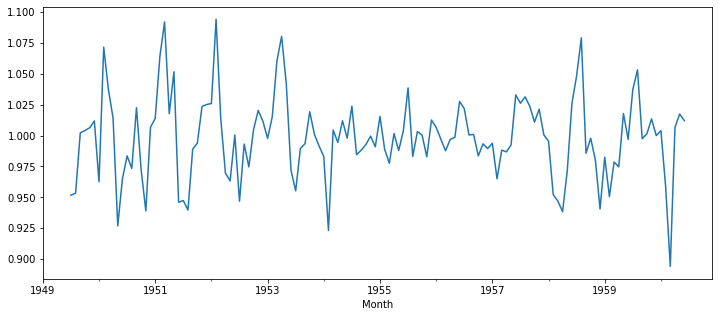

In [34]:
result.resid.plot()

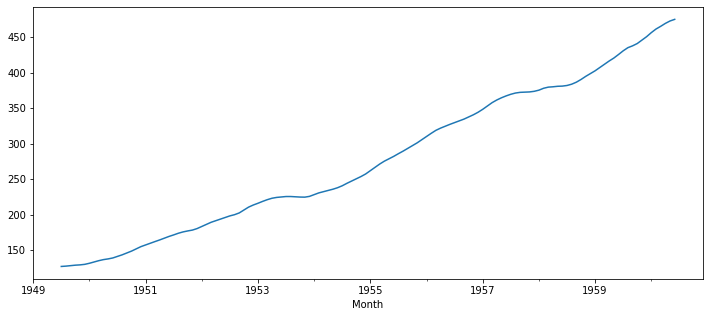

In [35]:
result.trend.plot()

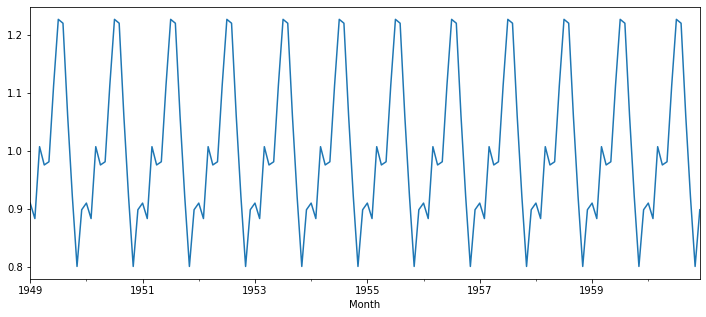

In [37]:
result.seasonal.plot()

### Exponentially Weighted Moving Averages - EWMA

In [49]:
df = pd.read_csv("data/airline_passengers.csv", index_col="Month")

In [50]:
df.shape

(144, 1)

In [51]:
df.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [53]:
df = df.dropna()

In [54]:
df.shape

(144, 1)

In [55]:
df.index = pd.to_datetime(df.index)

In [56]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [58]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [59]:
# create a simple moving average for 6 months (because index is in months)
df["6_month_SMA"] = df["Thousands of Passengers"].rolling(window=6).mean()

# create a 12 month sma
df["12_month_SMA"] = df["Thousands of Passengers"].rolling(window=12).mean()

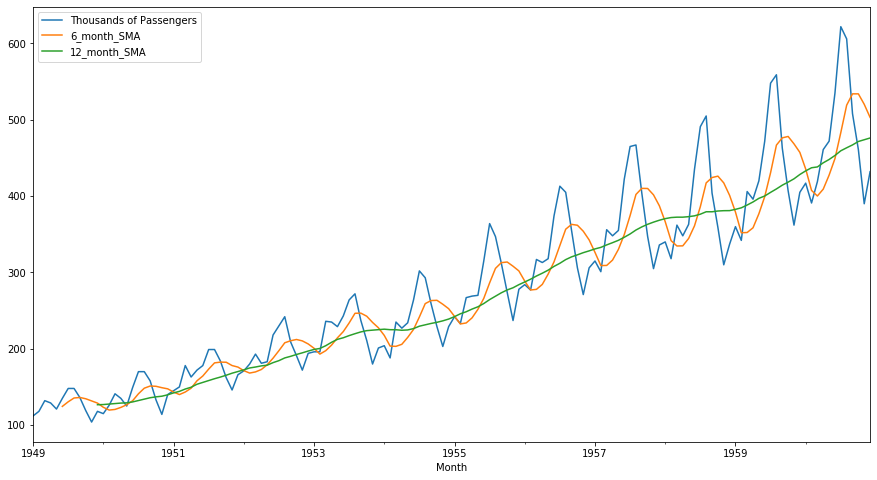

In [62]:
df.plot(figsize=(15, 8));

In [63]:
# exponentially moving averages

df["EWMA_12"] = df["Thousands of Passengers"].ewm(span=12).mean()

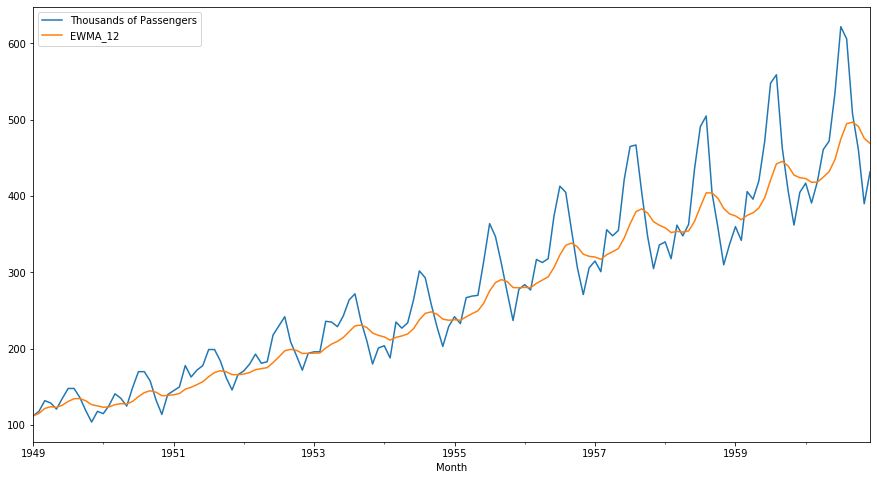

In [65]:
df[["Thousands of Passengers", "EWMA_12"]].plot(figsize=(15, 8));